### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import required libraries for carrying out linear regression:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as 'reviews'.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame to get a sense of the data.
reviews.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

# The output indicates that there are no missing values.

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
reviews.info()

# There appear to be two variables that may be useful for predicting customer loyalty points.
# I.e. age and spending_score (numeric values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.

reviews.describe()

# This usefully gives an idea of the scope of the data set, including average values for customer age,
# income and number of points.

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [6]:
# Exploration of potential outliers
# Outliers can then be removed to avoid them reducing the regression model's accuracy.
# Interquartile range for age, remuneration, spending score and loyalty points:
ageIQR = 49 - 29
remunIQR = 63.96 - 30.34
spendIQR = 73 - 32
loyalIQR = 1751.25 - 772

print(ageIQR)
print(remunIQR)
print(spendIQR)
print(loyalIQR)


20
33.620000000000005
41
979.25


In [7]:
# Outlier lower and upper limits for each variable are caulculated.

agelower = 29 - 1.5 * 20
agehigher = 49 + 1.5 * 20
print("Age Lower Limit: ", agelower)
print("Age Higher Limit: ", agehigher)

remunlower = 30.34 - 1.5 * 33.62
remunhigher = 63.96 + 1.5 * 33.62
print("Remuneration Lower Limit: ", remunlower)
print("Remuneration Higher Limit: ", remunhigher)

spendlower = 32 - 1.5 * 41
spendhigher = 73 + 1.5 * 41
print("Spending Score Lower Limit: ", spendlower)
print("Spending Score Higher Limit: ", spendhigher)

loyallower = 772 - 1.5 * 979.25
loyalhigher = 1751.25 + 1.5 * 979.25
print("Loyalty Points Lower Limit: ", loyallower)
print("Loyalty Points Higher Limit: ", loyalhigher)

Age Lower Limit:  -1.0
Age Higher Limit:  79.0
Remuneration Lower Limit:  -20.089999999999993
Remuneration Higher Limit:  114.38999999999999
Spending Score Lower Limit:  -29.5
Spending Score Higher Limit:  134.5
Loyalty Points Lower Limit:  -696.875
Loyalty Points Higher Limit:  3220.125


The results indicate that only loyalty_points have any discernible outliers.  A DataFrame will later be created removing these outliers to use in the regression models.

## 2. Drop columns

In [8]:
# Drop unnecessary columns that are not needed for the analysis (platform and language)
reviews = reviews.drop(reviews.columns[[6, 7]], axis=1)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [9]:
# Rename the column headers for ease.
reviews.rename(columns={'remuneration (k£)':'remuneration',
                        'spending_score (1-100)':'spending_score'}, inplace=True)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [10]:
# The DataFrame is filtered to create another DataFrame not including outliers within the loyalty points 
# category to test later with the model.
# Initially, the full data set (including possible outliers) will be used in the linear regression.
reviews2 = reviews[reviews['loyalty_points'] <= 3220.125]

reviews2.head()
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1734 non-null   object 
 1   age             1734 non-null   int64  
 2   remuneration    1734 non-null   float64
 3   spending_score  1734 non-null   int64  
 4   loyalty_points  1734 non-null   int64  
 5   education       1734 non-null   object 
 6   product         1734 non-null   int64  
 7   review          1734 non-null   object 
 8   summary         1734 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 135.5+ KB


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output containing the cleaned data.
reviews.to_csv("clean_reviews.csv")

In [12]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame.
clean_reviews.info()
clean_reviews.shape

# There are 2000 rows and 10 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


(2000, 10)

## 5. Linear regression

Outliers: a model was run (as below) using the reviews2 DataFrame (with loyalty points outliers removed), but models fit less well with this data set than with the original data set.  Therefore, all further analysis will be conducted with the original data set.

### 5a) spending vs loyalty

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

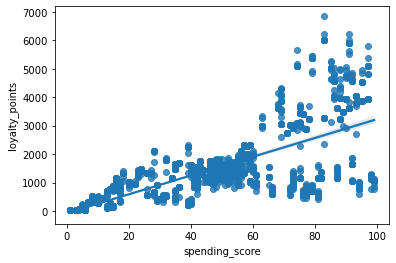

In [13]:
# Initial plot drawn to get a sense of the data relationship.
sns.regplot(x='spending_score', y='loyalty_points', data=clean_reviews)

In [14]:
# A linear regression model is created using the OLS method, predicting loyalty points using the spending score.
# Independent variable.
x = clean_reviews['spending_score'] 

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        20:07:04   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model suggests an R squared of 45%, which is not very reliable.
The p value is less than 0.05 and therefore significant, while the Durbin-Watson statistic suggests positive autocorrelation between the variables.  
It seems logical that higher points should correspond to a higher spend score, although this depends on how the spend score is allocated to each customer and this is unknown.

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.053) + 33.062 * clean_reviews['spending_score']

# View the output.
y_pred

0       1214.365
1       2602.969
2        123.319
3       2470.721
4       1247.427
          ...   
1995    2206.225
1996     189.443
1997    2933.589
1998     453.939
1999     189.443
Name: spending_score, Length: 2000, dtype: float64

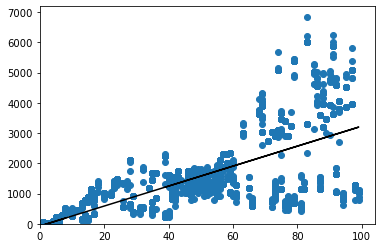

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()



Model Evaluation:
The graph shows linearity (albeit quite weak) up to a spending score around 60, after which it becomes less
predictable, with some customers having a lot more points than others with the same spending score.
It is not clear how Turtle Games determine a customer's spending score - this may be manual and open to interpretation, leading to very different points to score ratios and therefore limiting usefulness of the spend score for predictability.  It may also be that a customer with a high spend score (i.e. a regular customer) bought a product with a low value on this occasion.
One would assume quite a linear and reliable relationship should exist between these variables.

### 5b) remuneration vs loyalty

<AxesSubplot:xlabel='remuneration', ylabel='loyalty_points'>

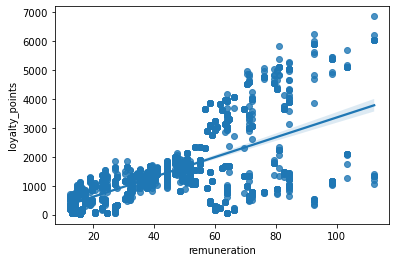

In [18]:
# Initial plot drawn to get a sense of the data relationship.
sns.regplot(x='remuneration', y='loyalty_points', data=clean_reviews)

In [19]:
# The linear regression model is created.
# Independent variable.
x = clean_reviews['remuneration'] 

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

test.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        20:07:06   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model indicates an R squared of 38%, which again is not very reliable and less so that the spending score model.  There is negative autocorrelation between the variables.

In [20]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [21]:
# Set the the X coefficient and the constant to generate the regression table.
y_remun_pred = (-65.687) + 34.188 * clean_reviews['remuneration']

# View the output.
y_remun_pred

0        354.82540
1        354.82540
2        382.85956
3        382.85956
4        410.89372
           ...    
1995    2821.83148
1996    3102.17308
1997    3102.17308
1998    3298.41220
1999    3102.17308
Name: remuneration, Length: 2000, dtype: float64

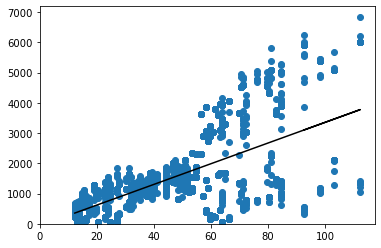

In [22]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_remun_pred, color='black')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()



Model Evaluation:
The model is less reliable than the previous.  This appears logical, given that income may not necessarily have a very linear relationship with spending, given that a customer may have a high income but choose to spend little, for example.  Again, a more linear relationship is seen at the lower income levels but becomes less predictable beyond approx. 60k of income.

### 5c) age vs loyalty

<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

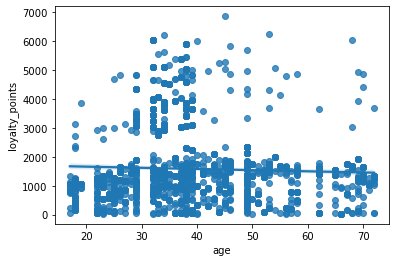

In [23]:
# Initial plot drawn to get a sense of the data relationship.
sns.regplot(x='age', y='loyalty_points', data=clean_reviews)

In [24]:
# Independent variable.
x = clean_reviews['age']

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

test.summary()

# Age appears to be a very poor predictor of loyalty points total.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        20:07:06   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has an incredibly low R squared score, implying it is a very poor model.  The variables have negative autocorrelation.

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [26]:
# Set the X coefficient and the constant to generate the regression table.
y_age_pred = (1736.518) + -4.012 * clean_reviews['age']

# View the output.
y_age_pred

# View the output.
y_age_pred

0       1664.302
1       1644.242
2       1648.254
3       1636.218
4       1604.122
          ...   
1995    1588.074
1996    1564.002
1997    1600.110
1998    1600.110
1999    1608.134
Name: age, Length: 2000, dtype: float64

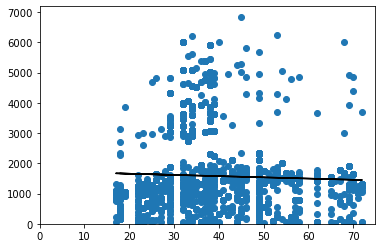

In [27]:
# Plot graph with regression line.
plt.scatter(x, y)

plt.plot(x, y_age_pred, color='black')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# The chart indicates no linearity between age and loyalty points total.

Model Evaluation:
There appears to be no relationship between age and loyalty points and the model is very poor.

## 6. Multilinear Regression (spend, remuneration and age)

Multilinear regression will now be used to test loyalty_points against all independent variables together.

In [28]:
# Import all the necessary packages.

import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [29]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variables.
X = clean_reviews[['spending_score', 'remuneration', 'age']] 

In [30]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [31]:
# Call the predictions for X (array).
multi.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [32]:
# Checking the value of R-squared, intercept and coefficients.
# The R-squared suggests a value of 83%.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307899
Coefficients:


[('spending_score', 34.18319657763365),
 ('remuneration', 34.00838549260247),
 ('age', 11.06065871184334)]

In [33]:
# Make predictions.
# Poor predicted value generated.
new_spend = 40
new_remuneration = 13.94
new_age = 33
print ('Predicted Value: \n', multi.predict([[new_spend ,new_remuneration ,new_age]])) 

Predicted Value: 
 [3.34674306]


In [34]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [35]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:07:08   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

In [36]:
print(multi.score(x_train, y_train)*100)

84.24398896169723


In [37]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [38]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [39]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

82.90723396315803


In [40]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.7           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


The results of the check for multicollinearity indicate very little correlation for spending_score and
remuneration, and none for remuneration.

In [41]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [42]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.20687709402362, 'LM Test p-value': 1.5690518681160543e-08, 'F-stat': 13.363756098044448, 'F-test p-value': 1.2899128216955065e-08}


There is no heteroscedacticity, therefore this does not neet fixing.

In [43]:
# Evaluate the model
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred)) 

Mean Absolute Error (Final): 402.23503056376904
Mean Square Error (Final): 277188.70233220584


Model evaluation:
The mean squared error is high, which does not indicate a good model (even though the R squared is 84% and consequently a resonably good value, and with very little autocorrelation).  The p value is also less than 0.05, suggesting significance.

The model will next be implemented without age to see if this improves the model.

## 7. Multilinear Regression (spend and remuneration)

In [44]:
# Define the dependent variable.
y = clean_reviews['loyalty_points'] 

# Define the independent variables.
X = clean_reviews[['spending_score', 'remuneration']] 

In [45]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [46]:
# Call the predictions for X (array).
multi.predict(X)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [47]:
# Checking the value of R-squared, intercept and coefficients.
# The R-squared suggests a value of 83%.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8269134701989259
Intercept:  -1700.3050970144357
Coefficients:


[('spending_score', 32.89269468782097), ('remuneration', 33.97949882180282)]

In [48]:
# Make predictions.
new_spend = 40
new_remuneration = 13.94
print ('Predicted Value: \n', multi.predict([[new_spend ,new_remuneration]])) 

Predicted Value: 
 [89.07690407]


In [49]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [50]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:07:08   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3237     39.588    -42.

In [51]:
print(multi.score(x_train, y_train)*100)

82.9782305142594


In [52]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [53]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


In [54]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

81.44236432529975


In [55]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0         8.9           const
1         1.0  spending_score
2         1.0    remuneration


There is no multicollinearity between the variables.

In [56]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog)

In [57]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 45.093019717501015, 'LM Test p-value': 1.6150098749724475e-10, 'F-stat': 23.156868353554387, 'F-test p-value': 1.219460638515025e-10}


The is no heteroscedasticity, therefore this does not need fixing.

In [58]:
# Evaluate the model
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred)) 

Mean Absolute Error (Final): 429.6636201690913
Mean Square Error (Final): 300944.09178342693


Model Evaluation:
As with the previous model, this also has a very high mean square error and almost the same R squared value (83%).  Removing the age variable has not made a considerable difference to the model.

Given that spend_score and loyalty_points showed some linearity up until a spending_score of approximately 60 (and given the inference that the spend score should logically be linear with points total), a linear regression will be conducted with only the data up until a spend score of 60.

## 8. Linear Regression on Spend Score <= 60

In [59]:
# Data is subset to only include all data up to a spend score of 60.
spend60 = clean_reviews[clean_reviews['spending_score'] <= 60]

spend60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1367 non-null   int64  
 1   gender          1367 non-null   object 
 2   age             1367 non-null   int64  
 3   remuneration    1367 non-null   float64
 4   spending_score  1367 non-null   int64  
 5   loyalty_points  1367 non-null   int64  
 6   education       1367 non-null   object 
 7   product         1367 non-null   int64  
 8   review          1367 non-null   object 
 9   summary         1367 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 117.5+ KB


In [60]:
# Independent variable.
x = spend60['spending_score'] 

# Dependent variable.
y = spend60['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = spend60).fit()

test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2055.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          1.74e-274
Time:                        20:07:08   Log-Likelihood:                -10015.
No. Observations:                1367   AIC:                         2.003e+04
Df Residuals:                    1365   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.8290     22.483      7.020      0.000     113.725     201.933
x             25.5150      0.563     45.327      0.000      24.411      26.619
==============================================================================
Omnibus:                       29.904   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.134
Skew:                           0.335   Prob(JB):                     1.05e-07
Kurtosis:                       3.340   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    157.829011
x             25.514988
dtype: float64
Standard errors:  Intercept    22.482734
x             0.562911
dtype: float64
Predicted values:  [1152.91355845  310.91894147 1178.42854685 ...  361.94891825  566.0688254
  361.94891825]


In [62]:
# Set the X coefficient and the constant to generate the regression table.
y_60_pred = (157.829) + 25.515 * spend60['spending_score']

# View the output.
y_60_pred

0       1152.914
2        310.919
4       1178.429
6        310.919
8        234.374
          ...   
1992     591.584
1994     744.674
1996     361.949
1998     566.069
1999     361.949
Name: spending_score, Length: 1367, dtype: float64

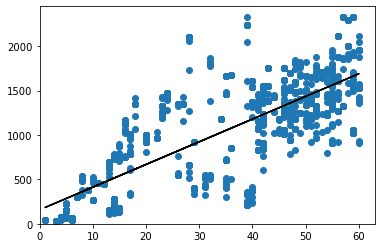

In [63]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_60_pred, color='black')

plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

Model Evaluation:
This model only shows an R squared value of 60%, and it is clear that the data still lacks linearity and may not be a good enough predictor of loyalty points.

## 9. Analysis of Customer Profiles vs. Loyalty Points

In order to better understand the data, some charts will be created to determine the characteristics of customers.  This will explore:
- top categories of age, income, spend score and points using histograms in order to see range;
- customer gender and education level using bar plots to clearly see top categories; 
- the gender and education level of the top and bottom points quartiles (as well as descriptive statistics to determine mean, max and min values);
- the top products purchased by the top and bottom quartiles.

Text(0, 0.5, 'Total Customers')

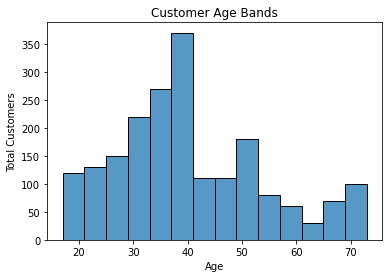

In [64]:
# Histograms created to explore most common characteristics of customers:

ax = sns.histplot(data=clean_reviews, x='age', binwidth=4)
ax.set_title("Customer Age Bands")
ax.set_xlabel("Age")
ax.set_ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

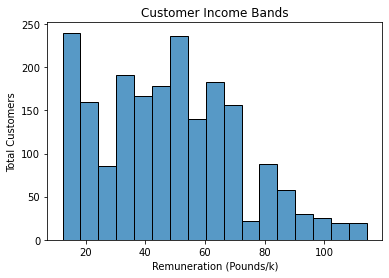

In [65]:
ax = sns.histplot(data=clean_reviews, x='remuneration', binwidth=6)
ax.set_title("Customer Income Bands")
ax.set_xlabel("Remuneration (Pounds/k)")
ax.set_ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

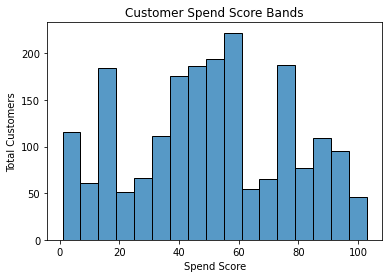

In [66]:
ax = sns.histplot(data=clean_reviews, x='spending_score', binwidth=6)
ax.set_title("Customer Spend Score Bands")
ax.set_xlabel("Spend Score")
ax.set_ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

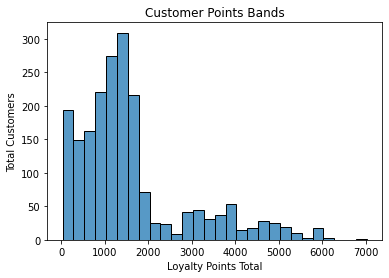

In [67]:
ax = sns.histplot(data=clean_reviews, x='loyalty_points', binwidth=250)
ax.set_title("Customer Points Bands")
ax.set_xlabel("Loyalty Points Total")
ax.set_ylabel("Total Customers")

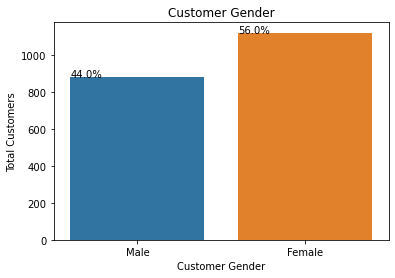

In [68]:
ax = sns.countplot(data=clean_reviews, x='gender')
ax.set_title("Customer Gender")
ax.set_xlabel("Customer Gender")
ax.set_ylabel("Total Customers")

total = len(clean_reviews)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

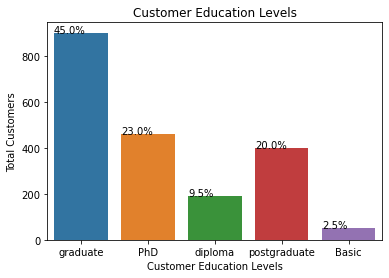

In [69]:
ax = sns.countplot(data=clean_reviews, x='education')
ax.set_title("Customer Education Levels")
ax.set_xlabel("Customer Education Levels")
ax.set_ylabel("Total Customers")

total = len(clean_reviews)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

In [70]:
# New DataFrames created for the top and bottom quartiles of loyalty points:

bottomquartile = clean_reviews[clean_reviews['loyalty_points'] <= 772]

topquartile = clean_reviews[clean_reviews['loyalty_points'] >= 1751]

bottomquartile.info()
topquartile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      504 non-null    int64  
 1   gender          504 non-null    object 
 2   age             504 non-null    int64  
 3   remuneration    504 non-null    float64
 4   spending_score  504 non-null    int64  
 5   loyalty_points  504 non-null    int64  
 6   education       504 non-null    object 
 7   product         504 non-null    int64  
 8   review          504 non-null    object 
 9   summary         504 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 43.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 86 to 1997
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      501 non-null    int64  
 1   gender          501 non-null    object 
 2  

In [71]:
bottomquartile.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [72]:
bottomquartile.describe()

,Unnamed: 0,age,remuneration,spending_score,loyalty_points,product
count,504.00000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1061.19246,39.359127,33.406865,26.668651,383.833333,3514.192460
std,625.39756,14.235034,23.639723,25.473787,238.650089,3135.110723
min,0.00000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,537.50000,26.000000,15.580000,8.000000,150.750000,1012.000000
50%,1027.00000,38.000000,22.960000,14.000000,406.000000,2273.500000
75%,1710.25000,49.000000,59.860000,35.000000,573.000000,5565.500000
max,1999.00000,72.000000,92.660000,94.000000,772.000000,11086.000000


In [73]:
topquartile.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
86,86,Female,54,46.74,58,1998,diploma,504,great book,Five Stars
88,88,Female,36,47.56,60,1951,PhD,4452,This was a great little activity book. There a...,This was a great little activity book
92,92,Male,46,49.20,49,1777,graduate,6715,This little book is so cute! My kids love it. ...,Getting a surprising amount of use out of this...
101,101,Female,49,50.84,48,1809,graduate,3524,The book is only 4 pages and it's about the si...,Small and boring
102,102,Male,69,50.84,59,1904,PhD,3525,Very nice product.,Five Stars


In [74]:
topquartile.describe()

,Unnamed: 0,age,remuneration,spending_score,loyalty_points,product
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,956.768463,38.680639,68.670499,72.948104,3402.153693,5358.159681
std,522.297687,9.434713,15.827797,17.243819,1195.609190,3019.356749
min,86.000000,18.000000,27.060000,28.000000,1751.000000,107.000000
25%,527.000000,33.000000,57.400000,59.000000,2294.000000,2874.000000
50%,957.000000,37.000000,63.960000,75.000000,3315.000000,4712.000000
75%,1384.000000,41.000000,79.540000,88.000000,4136.000000,7384.000000
max,1997.000000,72.000000,112.340000,97.000000,6847.000000,11086.000000


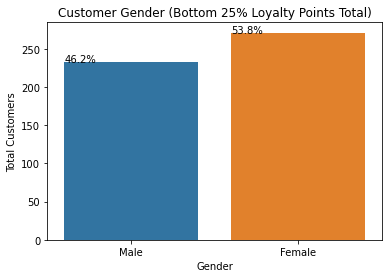

In [75]:
# Countplots plotted to explore gender and education of the bottom quartile:

ax = sns.countplot(data=bottomquartile, x='gender')
ax.set_title("Customer Gender (Bottom 25% Loyalty Points Total)")
ax.set_xlabel("Gender")
ax.set_ylabel("Total Customers")

total = len(bottomquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

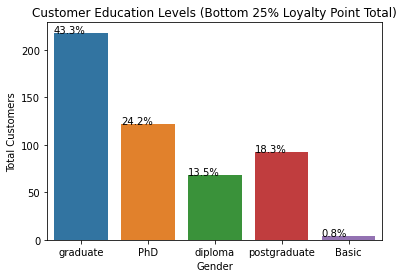

In [76]:
ax = sns.countplot(data=bottomquartile, x='education')
ax.set_title("Customer Education Levels (Bottom 25% Loyalty Point Total)")
ax.set_xlabel("Gender")
ax.set_ylabel("Total Customers")

total = len(bottomquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

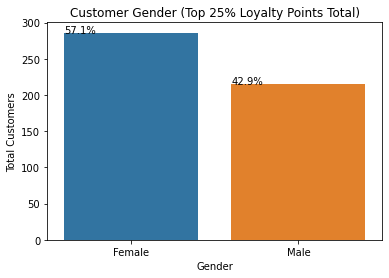

In [77]:
# Countplots plotted to explore the gender and education of the top quartile:

ax = sns.countplot(data=topquartile, x='gender')
ax.set_title("Customer Gender (Top 25% Loyalty Points Total)")
ax.set_xlabel("Gender")
ax.set_ylabel("Total Customers")

total = len(topquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

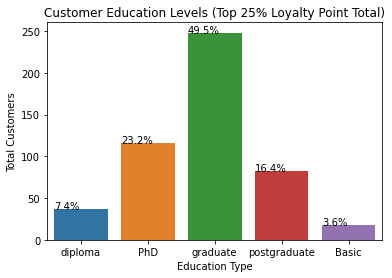

In [78]:
ax = sns.countplot(data=topquartile, x='education')
ax.set_title("Customer Education Levels (Top 25% Loyalty Point Total)")
ax.set_xlabel("Education Type")
ax.set_ylabel("Total Customers")

total = len(topquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

Text(0, 0.5, 'Total Customers')

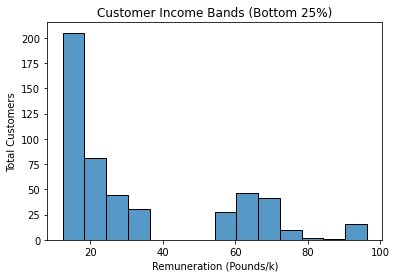

In [79]:
ax = sns.histplot(data=bottomquartile, x='remuneration', binwidth=6)
ax.set_title("Customer Income Bands (Bottom 25%)")
ax.set_xlabel("Remuneration (Pounds/k)")
ax.set_ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

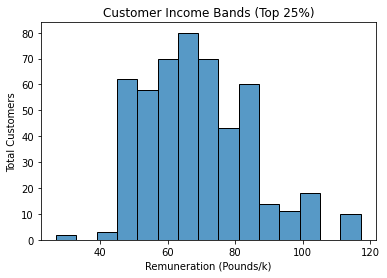

In [80]:
ax = sns.histplot(data=topquartile, x='remuneration', binwidth=6)
ax.set_title("Customer Income Bands (Top 25%)")
ax.set_xlabel("Remuneration (Pounds/k)")
ax.set_ylabel("Total Customers")

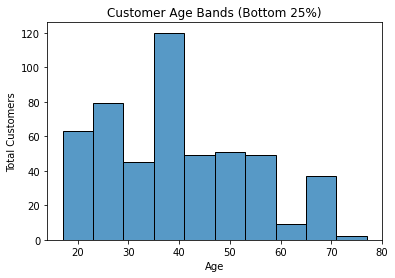

In [81]:
ax = sns.histplot(data=bottomquartile, x='age', binwidth=6)
ax.set_title("Customer Age Bands (Bottom 25%)")
ax.set_xlabel("Age")
ax.set_ylabel("Total Customers")

plt.savefig('bottom_age.png')

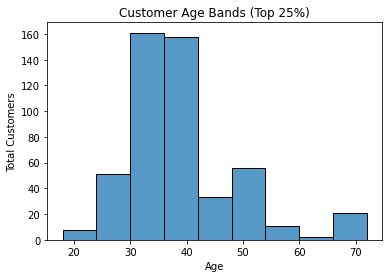

In [82]:
ax = sns.histplot(data=topquartile, x='age', binwidth=6)
ax.set_title("Customer Age Bands (Top 25%)")
ax.set_xlabel("Age")
ax.set_ylabel("Total Customers")

plt.savefig('top_age.png')

Text(0, 0.5, 'Total Customers')

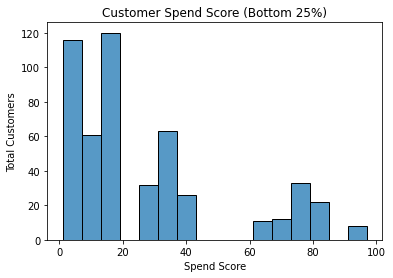

In [83]:
ax = sns.histplot(data=bottomquartile, x='spending_score', binwidth=6)
ax.set_title("Customer Spend Score (Bottom 25%)")
ax.set_xlabel("Spend Score")
ax.set_ylabel("Total Customers")

Text(0, 0.5, 'Total Customers')

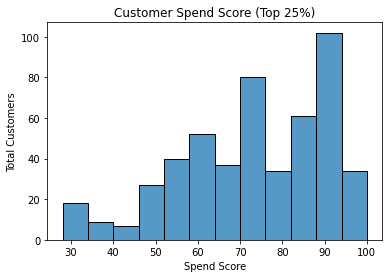

In [84]:
ax = sns.histplot(data=topquartile, x='spending_score', binwidth=6)
ax.set_title("Customer Spend Score (Top 25%)")
ax.set_xlabel("Spend Score")
ax.set_ylabel("Total Customers")

In [85]:
# Products bought by the bottom quartile:

print(bottomquartile['product'].head(20))

0      453
1      466
2      254
3      263
4      291
5      977
6      979
7     1012
8     1031
9     1459
10    1463
12    1497
13    1501
14    1506
15     123
16     486
17     830
18    1175
20    1212
22    1307
Name: product, dtype: int64


In [86]:
# Products bought by the top quartile:

print(topquartile['product'].head(20))

86       504
88      4452
92      6715
101     3524
102     3525
104     3619
107     3165
110      283
117     2387
118     2404
119     5429
120     5430
122     5493
123     5510
125     8235
127     2849
129     2874
131     2457
133     2518
135    10232
Name: product, dtype: int64


## 8. Observations and insights

***Your observations here...***






None of the predictive models were particularly reliable for prediction of loyalty points.  
When considering the assumptions of linear regression:
- variables on the whole do not have enough of a linear relationship;
- data does not appear to be normally-distributed.

Although the multilinear regression showed little autocorrelation and there were no signifcant outliers or missing values, the models are not reliable predictors.  

It would be of benefit to compare a customer's 'total' points against variables - this may result in better models and more predictive power; the available data appears to show points for individual purchases rather than customers' total points.

On average, customers are most likely to be graduates, evenly split between male and female (although slightly more are female) and are 39 years of age.  Of those in the top loyalty points quartile, customers tend to have higher income and higher spending scores than those in the bottom quartile.

Loyalty points gained for an individual purchase do not necessarily translate to a high or low spending score, meaning that some customers in the bottom quartile possibly buy a lot of products but at cheaper cost.  Again, more would need to be understood about how spending score is allocated.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [87]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [88]:
# Load the CSV file(s) as clusterdf, using only the required columns.
clusterdf = pd.read_csv('clean_reviews.csv', usecols=['remuneration', 'spending_score'])


# View DataFrame.
clusterdf.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [89]:
# Descriptive statistics.
clusterdf.info()
clusterdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

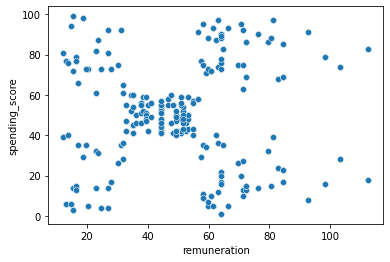

In [90]:
# Create a scatterplot with Seaborn to initially view the data.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=clusterdf)

The scatterplot seems to indicate at least 5 clusters.

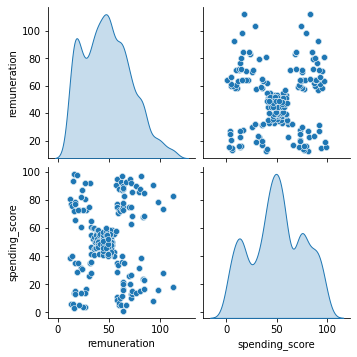

In [91]:
# Create a pairplot with Seaborn.
x = clusterdf[['remuneration', 'spending_score']]

sns.pairplot(clusterdf,
             vars=x,
             diag_kind='kde')

The pairplot indicates that the mid range of both remuneration and spending score are the most concentrated clusters (i.e. with customers most commonly in this mid range).

## 3. Elbow and silhoutte methods

The elbow and silhouette methods will be deployed to identify the best number of clusters.

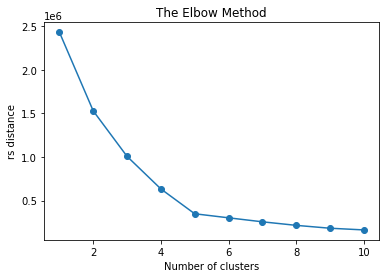

In [92]:
# Determine the number of clusters: Elbow method.
rs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    rs.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         rs,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("rs distance")

plt.show()

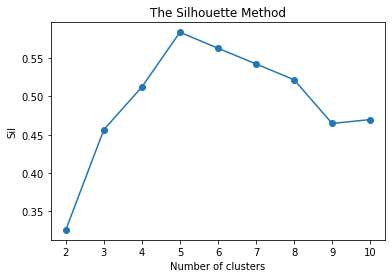

In [93]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Both methods suggest that 5 is the optimum number of clusters in the data set.

## 4. Evaluate k-means model at different values of *k*

5, 6 or 7 clusters appear to be the best fit - all are fitted to evaluate which is the best option.

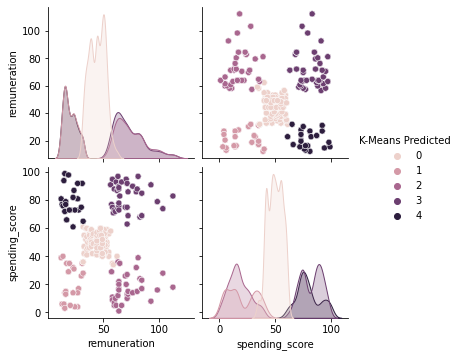

In [94]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

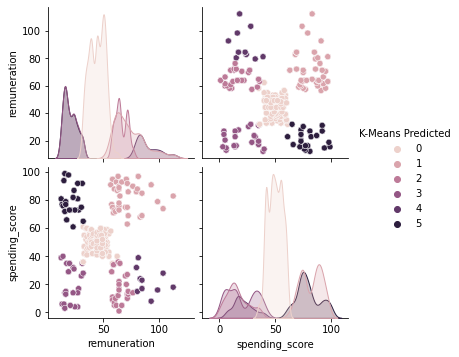

In [95]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

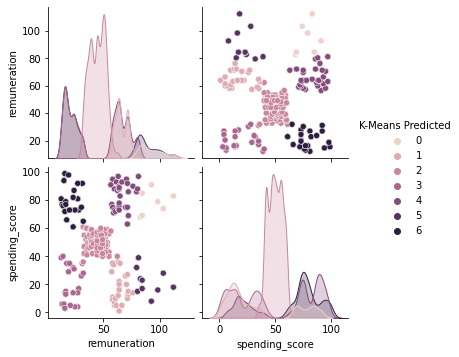

In [96]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

5 clusters initially seemed the best choice on first observations.  However, 7 are chosen as the best fit for the final model, owing to the broadness of the clusters at the higher remuneration end of the chart.  The pairplots indicate that most customers have an income below or up to 60k; the 5 cluster model gave the impression that more customers fall within the higher remuneration end of the chart, which would not be an accurate representation.

In [97]:
# Apply the final model.
# Seven clusters chosen.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters


In [98]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

Cluster 2 has the most cumstomers within it.

## 6. Plot and interpret the clusters

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  6
2         13.12               6                  3
3         13.12              77                  6
4         13.94              40                  3


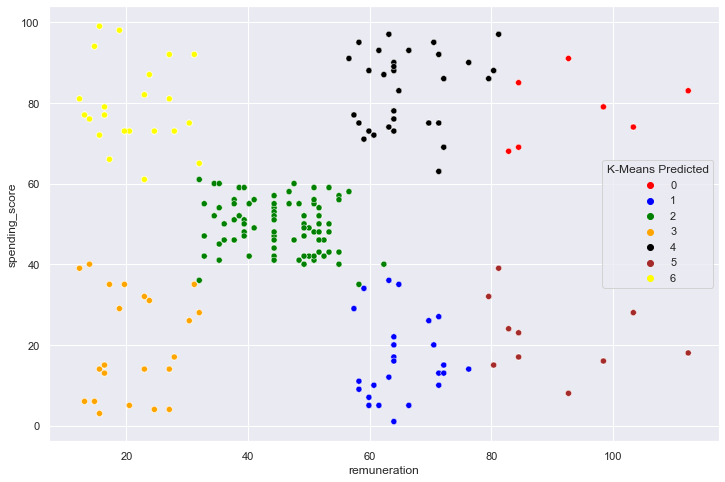

In [99]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow'])

plt.savefig('k_means_graph.png')

# View the DataFrame.
print(x.head())

In [100]:
# The predicted values are explorted to csv in order to use the data to create a new DataFrame for analysis of
# the output.
x.to_csv("cluster_predictions.csv")

In [101]:
cluster_predictions = pd.read_csv('cluster_predictions.csv')

cluster_predictions.head()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
0,0,12.30,39,3
1,1,12.30,81,6
2,2,13.12,6,3
3,3,13.12,77,6
4,4,13.94,40,3


In [102]:
cluster_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   remuneration       2000 non-null   float64
 2   spending_score     2000 non-null   int64  
 3   K-Means Predicted  2000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 62.6 KB


In [103]:
# The data is filtered by cluster number in order to analyse each cluster's statistics.

cluster0 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 0]

cluster1 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 1]

cluster2 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 2]

cluster3 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 3]

cluster4 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 4]

cluster5 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 5]

cluster6 = cluster_predictions[cluster_predictions['K-Means Predicted'] == 6]

In [104]:
cluster0.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,85.000000,85.000000,85.000000,85.0
mean,1188.705882,92.901176,78.658824,0.0
std,567.168779,9.989221,8.274391,0.0
min,187.000000,82.820000,68.000000,0.0
25%,787.000000,84.460000,69.000000,0.0
50%,1387.000000,92.660000,79.000000,0.0
75%,1700.000000,98.400000,85.000000,0.0
max,1997.000000,112.340000,91.000000,0.0


In [105]:
cluster1.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,214.000000,214.000000,214.000000,214.0
mean,875.934579,65.787757,15.808411,1.0
std,474.649884,5.298079,9.717886,0.0
min,124.000000,57.400000,1.000000,1.0
25%,528.500000,61.500000,10.000000,1.0
50%,931.000000,63.960000,14.000000,1.0
75%,1333.500000,71.340000,22.000000,1.0
max,1748.000000,76.260000,36.000000,1.0


In [106]:
cluster2.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,767.000000,767.000000,767.000000,767.0
mean,930.913950,44.285346,49.671447,2.0
std,548.801315,6.980789,6.340965,0.0
min,42.000000,31.980000,35.000000,2.0
25%,473.500000,38.540000,45.000000,2.0
50%,903.000000,44.280000,50.000000,2.0
75%,1422.500000,50.020000,55.000000,2.0
max,1957.000000,62.320000,61.000000,2.0


In [107]:
cluster3.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,271.000000,271.000000,271.000000,271.0
mean,1126.062731,20.424354,19.763838,3.0
std,659.440138,5.719723,12.666796,0.0
min,0.000000,12.300000,3.000000,3.0
25%,603.000000,15.580000,6.000000,3.0
50%,1206.000000,19.680000,15.000000,3.0
75%,1787.000000,24.600000,32.000000,3.0
max,1991.000000,31.980000,40.000000,3.0


In [108]:
cluster4.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,271.000000,271.000000,271.000000,271.0
mean,899.771218,67.073579,83.059041,4.0
std,485.877777,7.125886,9.424762,0.0
min,123.000000,56.580000,63.000000,4.0
25%,530.000000,61.500000,75.000000,4.0
50%,937.000000,63.960000,86.000000,4.0
75%,1344.000000,71.340000,90.000000,4.0
max,1755.000000,81.180000,97.000000,4.0


In [109]:
cluster5.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,123.000000,123.000000,123.000000,123.0
mean,1189.813008,89.666667,21.178862,5.0
std,565.047994,10.077961,8.732859,0.0
min,180.000000,79.540000,8.000000,5.0
25%,781.000000,81.180000,16.000000,5.0
50%,1382.000000,84.460000,18.000000,5.0
75%,1694.000000,98.400000,28.000000,5.0
max,1999.000000,112.340000,39.000000,5.0


In [110]:
cluster6.describe()

,Unnamed: 0,remuneration,spending_score,K-Means Predicted
count,269.000000,269.000000,269.000000,269.0
mean,1119.520446,20.353680,79.416357,6.0
std,656.659471,5.737253,10.395781,0.0
min,1.000000,12.300000,61.000000,6.0
25%,603.000000,15.580000,73.000000,6.0
50%,1205.000000,19.680000,77.000000,6.0
75%,1783.000000,24.600000,87.000000,6.0
max,1990.000000,31.980000,99.000000,6.0


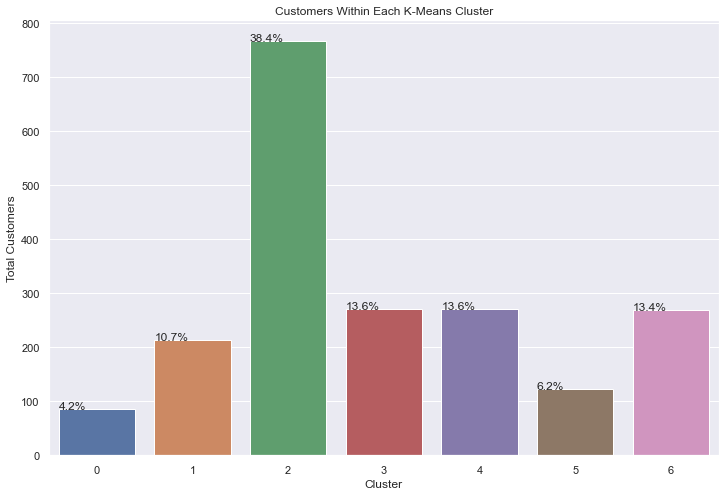

In [111]:
ax = sns.countplot(data=cluster_predictions, x='K-Means Predicted')
ax.set_title("Customers Within Each K-Means Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Total Customers")

total_cluster = len(cluster_predictions)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_cluster)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.savefig('cluster_split.png')

In [112]:
# The cluster predictions are merged into a new dataframe with the cluster results - this might be useful for later
# analysis, as we can which category each reviewer falls into.

data_with_cluster = pd.merge(clean_reviews, cluster_predictions, how='inner', on='Unnamed: 0')

In [113]:
data_with_cluster.head()

,Unnamed: 0,gender,age,remuneration_x,spending_score_x,loyalty_points,education,product,review,summary,remuneration_y,spending_score_y,K-Means Predicted
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,12.30,39,3
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,12.30,81,6
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",13.12,6,3
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,13.12,77,6
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,13.94,40,3


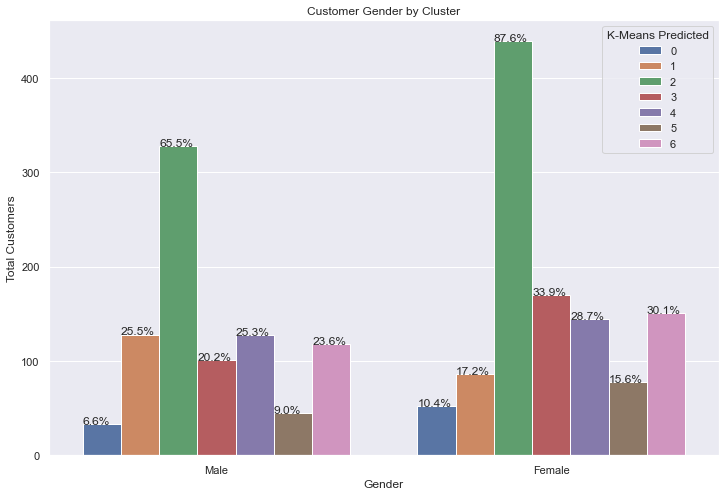

In [114]:
# Gender split of customers by cluster:
ax = sns.countplot(data=data_with_cluster, x='gender', hue='K-Means Predicted')
ax.set_title("Customer Gender by Cluster")
ax.set_xlabel("Gender")
ax.set_ylabel("Total Customers")

total = len(topquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

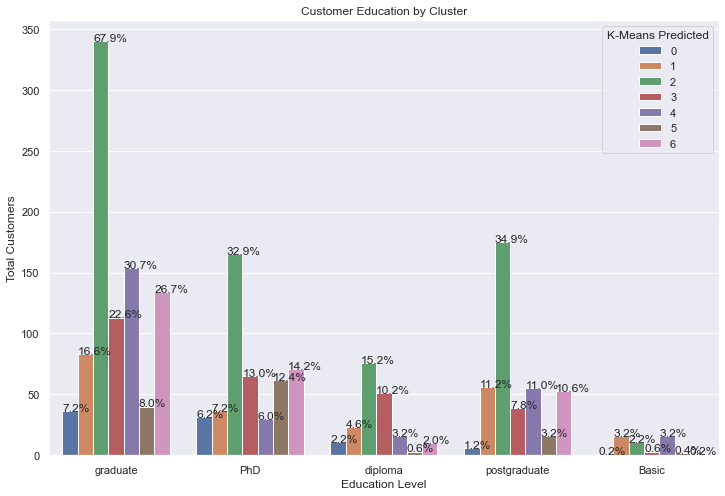

In [115]:
# Education split of customers by cluster:
ax = sns.countplot(data=data_with_cluster, x='education', hue='K-Means Predicted')
ax.set_title("Customer Education by Cluster")
ax.set_xlabel("Education Level")
ax.set_ylabel("Total Customers")

total = len(topquartile)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

In [116]:
# It appears from the analysis that there is a linear relationship between remuneration and spending_score.
# Clusters 2, 3 and 4 are exported as CSV and merged using Excel.
cluster2.to_csv("cluster2.csv")
cluster3.to_csv("cluster3.csv")
cluster4.to_csv("cluster4.csv")

In [117]:
# The data for the three clusters is imported.
key_cluster = pd.read_csv('cluster_data_for_lr.csv')

key_cluster.head()

,remuneration,spending_score,K-Means Predicted
0,56.58,91,4
1,57.40,77,4
2,58.22,95,4
3,58.22,75,4
4,58.22,75,4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

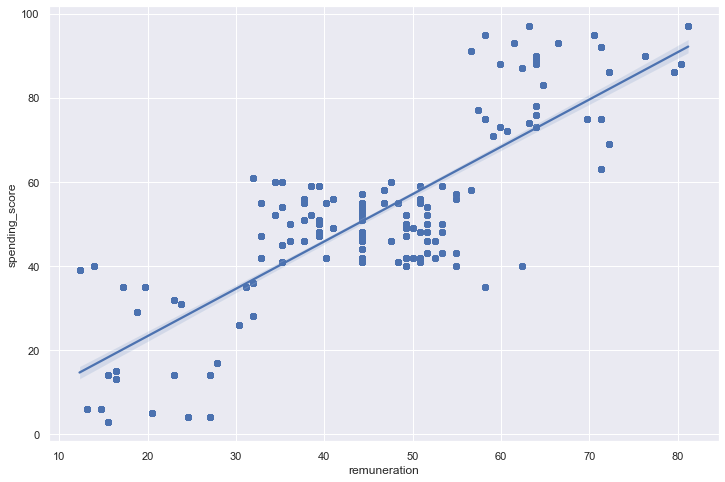

In [118]:
# A basic linear plot is created to visualise this idea.

sns.regplot(x='remuneration', y='spending_score', data=key_cluster)

## 7. Discuss: Insights and observations

***Your observations here...***

Cluster 2, right in the centre of the chart, is the largest cluster with most customers, followed equally by clusters 3 and 4.  Evidently, there are customers with a high spending score and low remuneration and vice verser (evidenced by customers in clusters 0, 1, 5 and 6).  However, the top three clusters show a specific income difference, which appears to relate to their spending score; in fact, it suggests a linear relationship!  This further indicates that a customer's total points alongside remuneration and spending score data could result in an imporved prediction model.
  

7 clusters are the best fit for the k-means model, in order to ensure that the clusters at the top of the spend and remuneration scale don't skew the findings.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [119]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [120]:
# Load the data set as nlpreviews.
# The 'product' column is included so that review analysis can be related to the product to which it refers.
nlpreviews = pd.read_csv('clean_reviews.csv', usecols=['review', 'summary', 'product'])

# View DataFrame.
nlpreviews.head()

,product,review,summary
0,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,291,As my review of GF9's previous screens these w...,Money trap


In [121]:
# Explore data set.
nlpreviews.shape

(2000, 3)

In [122]:
# Determine if there are any missing values.
nlpreviews['review'].isna().sum()

0

In [123]:
nlpreviews['summary'].isna().sum()

0

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [124]:
# Review: Change all to lower case and join with a space.

nlpreviews['review'] = nlpreviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

nlpreviews['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [125]:
# Summary: Change all to lower case and join with a space.

nlpreviews['summary'] = nlpreviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

nlpreviews['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [126]:
# Replace all the punctuations in review column.
nlpreviews['review'] = nlpreviews['review'].str.replace('[^\w\s]','')

# View output.
nlpreviews['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [127]:
# Replace all the puncuations in summary column.
nlpreviews['summary'] = nlpreviews['summary'].str.replace('[^\w\s]','')

# View output.
nlpreviews['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [128]:
# Check for duplicates in the review column.
nlpreviews.review.duplicated().sum()

50

In [129]:
# Check for duplicates in the summary column.
nlpreviews.summary.duplicated().sum()

649

In [130]:
# Drop duplicates in both columns (first the review column, then the summary column).
noduplicates = nlpreviews.drop_duplicates(subset=['review'])

# View DataFrame.
noduplicates.reset_index(inplace=True)
noduplicates.head()

,index,product,review,summary
0,0,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,466,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,254,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,263,amazing buy bought it as a gift for our new dm...,five stars
4,4,291,as my review of gf9s previous screens these we...,money trap


In [131]:
# Check the duplicates have been removed.

noduplicates.shape

(1950, 4)

In [132]:
noduplicates2 = noduplicates.drop_duplicates(subset=['summary'])

# View DataFrame.
noduplicates2.reset_index(inplace=True)
noduplicates2.head()

,level_0,index,product,review,summary
0,0,0,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,466,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,254,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,263,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,291,as my review of gf9s previous screens these we...,money trap


In [133]:
# Check the duplicates have been removed.

noduplicates2.shape

(1349, 5)

## 3. Tokenise and create wordclouds

In [134]:
# Create new DataFrame (copy DataFrame).
all_reviews = pd.DataFrame(noduplicates2)

# View DataFrame.
all_reviews.head()

,level_0,index,product,review,summary
0,0,0,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,466,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,254,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,263,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,291,as my review of gf9s previous screens these we...,money trap


In [135]:
# Apply tokenisation to both columns.
all_reviews['tokens1'] = all_reviews['review'].apply(word_tokenize)

# View DataFrame.
all_reviews['tokens1'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens1, dtype: object

In [136]:
all_reviews['tokens2'] = all_reviews['summary'].apply(word_tokenize)

all_reviews['tokens2'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens2, dtype: object

In [137]:
print(all_reviews)

      level_0  index  product  \
0           0      0      453   
1           1      1      466   
2           2      2      254   
3           3      3      263   
4           4      4      291   
...       ...    ...      ...   
1344     1940   1989     1031   
1345     1941   1990      453   
1346     1943   1992      254   
1347     1945   1994      291   
1348     1946   1995      977   

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1344  this is a fun card game for people who like wo...   
1345  fun for the family just make certain you agree...   
1346  great game to keep the mind active we play it ...   
1347  we are 

In [138]:
# Convert the tokens1 column from lists to a string in a new DataFrame in order to create Word Cloud.
review_words = pd.DataFrame(all_reviews['tokens1'].apply(lambda x: ','.join(map(str, x))))

In [139]:
review_words.head()

,tokens1
0,"when,it,comes,to,a,dms,screen,the,space,on,the..."
1,"an,open,letter,to,galeforce9,your,unpainted,mi..."
2,"nice,art,nice,printing,why,two,panels,are,fill..."
3,"amazing,buy,bought,it,as,a,gift,for,our,new,dm..."
4,"as,my,review,of,gf9s,previous,screens,these,we..."


In [140]:
# Convert the tokens2 column from lists to a string in a new DataFrame in order to create Word Cloud.
summary_words = pd.DataFrame(all_reviews['tokens2'].apply(lambda x: ','.join(map(str, x))))

In [141]:
summary_words.head()

,tokens2
0,"the,fact,that,50,of,this,space,is,wasted,on,ar..."
1,"another,worthless,dungeon,masters,screen,from,..."
2,"pretty,but,also,pretty,useless"
3,"five,stars"
4,"money,trap"


In [142]:
# Review: Create a word cloud.
all_tokens1 = ''

for i in range(review_words.shape[0]):
    # Add each token to the list.
    all_tokens1 = all_tokens1 + review_words['tokens1'][i]

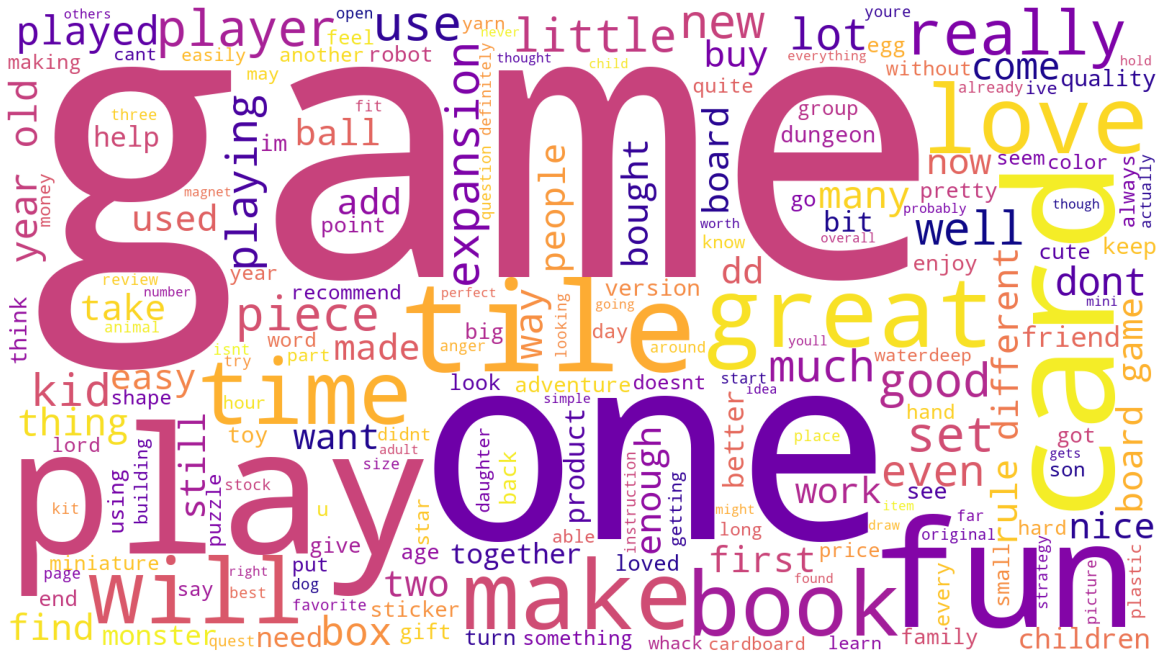

In [143]:
# Review: Plot the WordCloud image.
# import matplotlib.pyplot as plt 
# import seaborn as sns

# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens1) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [144]:
# Summary: Create a word cloud.
all_tokens2 = ''

for i in range(summary_words.shape[0]):
    # Add each token to the list.
    all_tokens2 = all_tokens2 + summary_words['tokens2'][i]

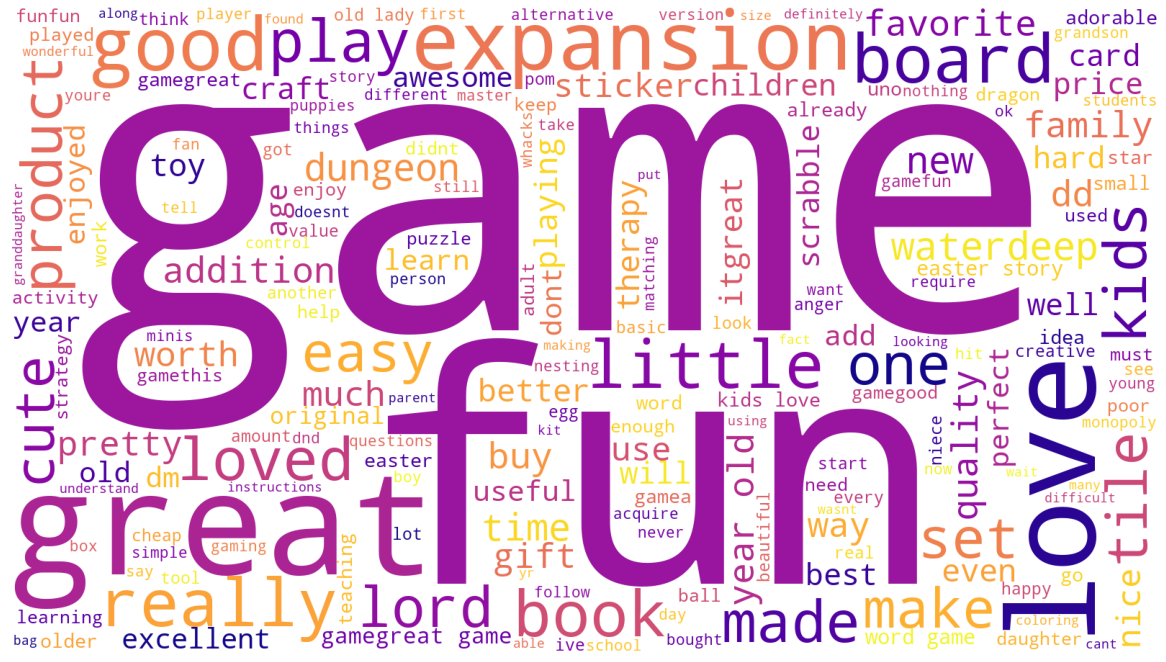

In [145]:
# Summary: Plot the WordCloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens2) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [146]:
# Determine the frequency distribution.
all_words1 = []

for i in range(all_reviews.shape[0]):
    # Add each token to the list.
    all_words1 = all_words1 + all_reviews['tokens1'][i]

fdist1 = FreqDist(all_words1)

# Preview data.
fdist1

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [147]:
all_words2 = []

for i in range(all_reviews.shape[0]):
    # Add each token to the list.
    all_words2 = all_words2 + all_reviews['tokens2'][i]

fdist2 = FreqDist(all_words2)

# Preview data.
fdist2

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [148]:
# Delete all the alpanum.
tokens_review = [word for word in all_words1 if word.isalnum()]

In [149]:
tokens_summary = [word for word in all_words2 if word.isalnum()]

In [150]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create filtered lists of tokens without stopwords.
tokens_review2 = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens_summary2 = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define empty string variables for review and summary columns.
tokens_review2_string = ''
tokens_summary2_string = ''

for value in tokens_review:
    # Add each filtered token word to the string.
    tokens_review2_string = tokens_review2_string + value + ' '

for value in tokens_summary:
    # Add each filtered token word to the string.
    tokens_summary2_string = tokens_summary2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Claire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [151]:
# Create a 'review' wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_review2_string) 


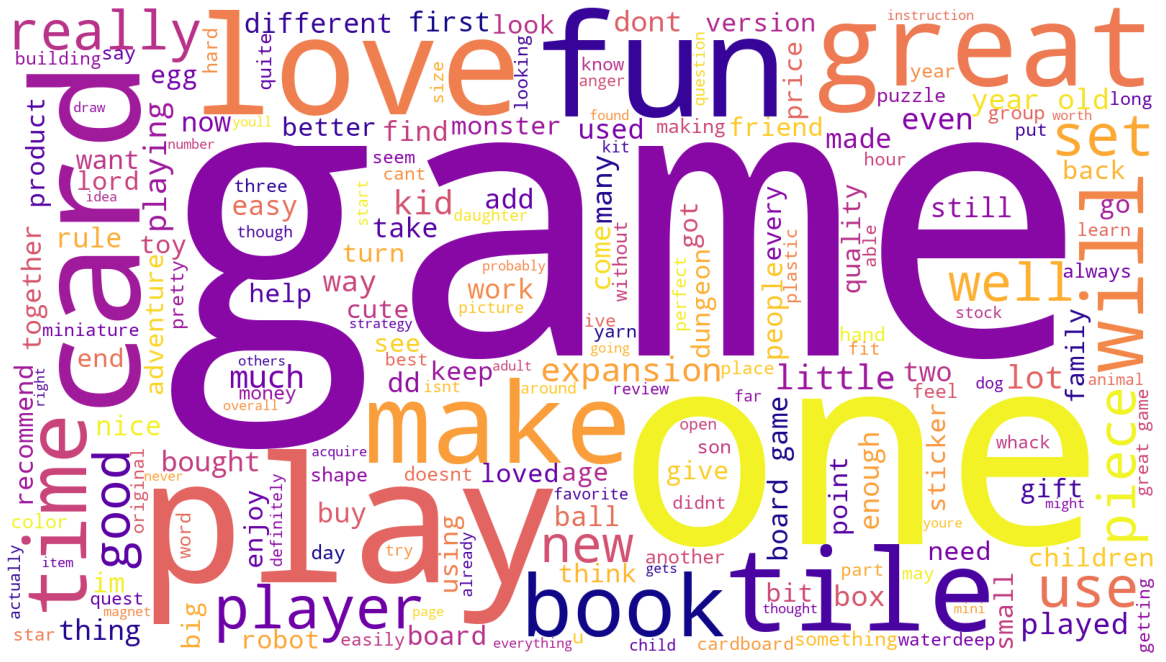

In [152]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig("review_wordcloud.png", format="png")
plt.show()


In [153]:
# Create a 'summary' wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summary2_string) 

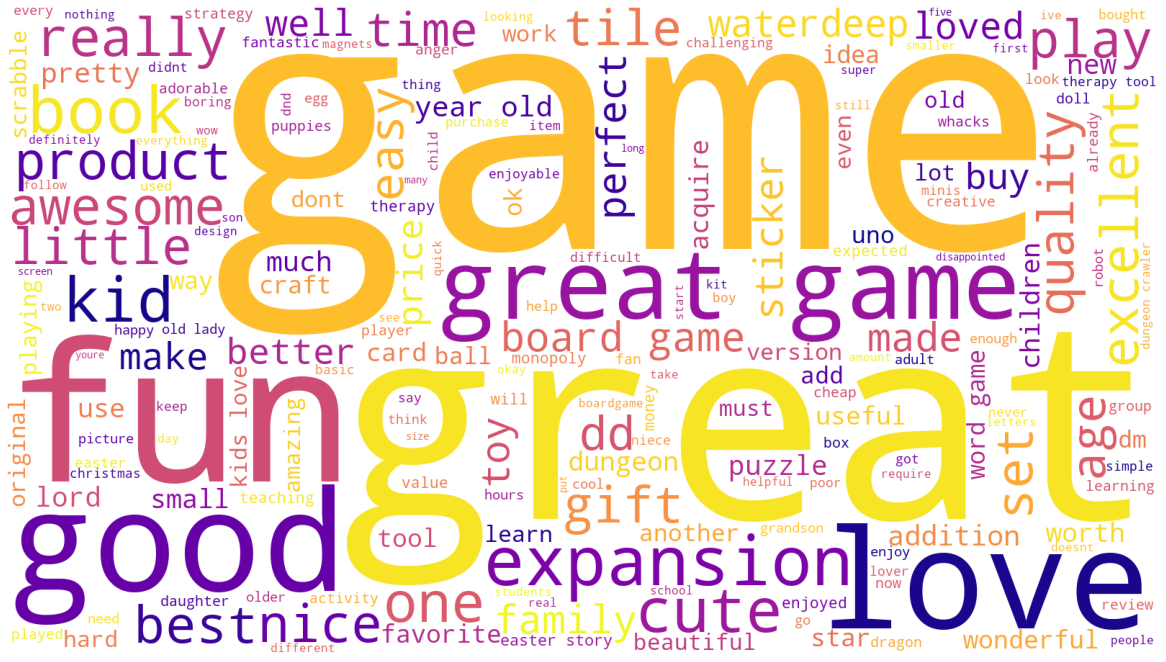

In [154]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig("summary_wordcloud.png", format="png")
plt.show()



### 4d) Identify 15 most common words and polarity

In [155]:
# Determine the 15 most common words for the review column.
# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(tokens_review2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


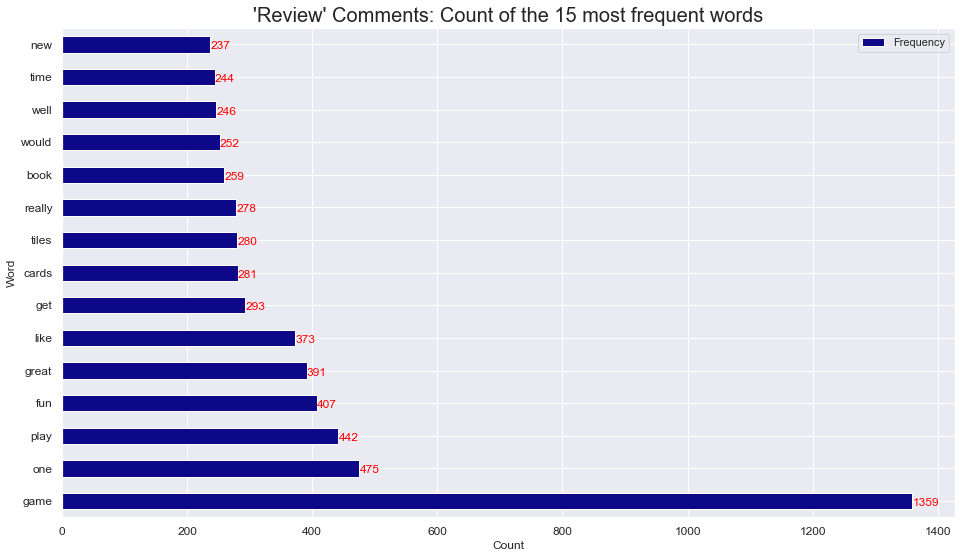

In [156]:
#Create a bar plot visualisation of the top 15 words.
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("'Review' Comments: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
plt.savefig('top_15_review_words.png')

In [157]:
# Determine the 15 most common words for the summary column.
# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(tokens_summary2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


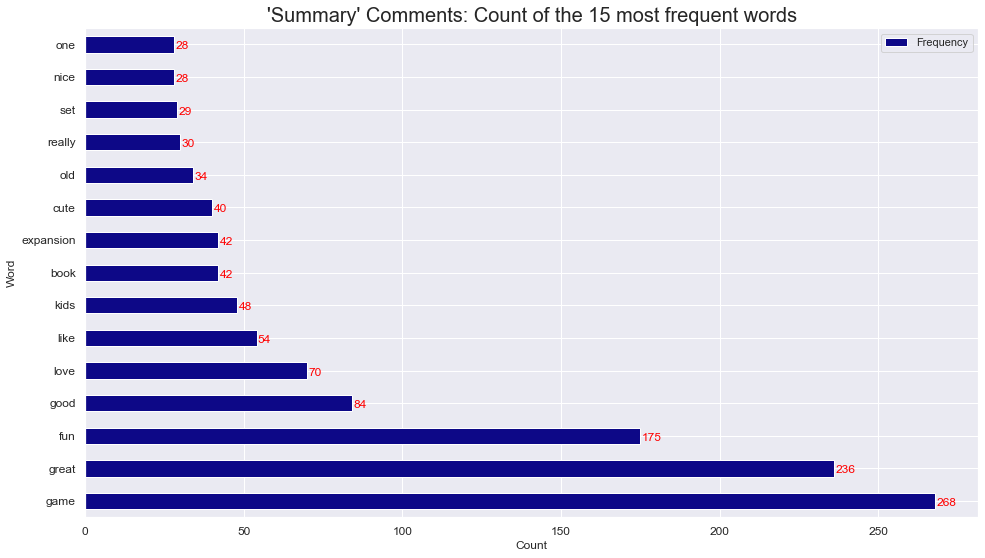

In [158]:
#Create a bar plot visualisation of the top 15 words.
# Set the plot type.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("'Summary' Comments: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

plt.savefig('top_15_summary_words.png')

Several words appear in both sets of top 15.  Of interest, both 'game' and 'book' feature frequently.  Does this suggest that these are amongst the most popular products?

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [159]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [160]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each column.
all_reviews['polarity_review'] = all_reviews['review'].apply(generate_polarity)

# Preview the result.
all_reviews['polarity_review'].head()


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [161]:
all_reviews['polarity_summary'] = all_reviews['summary'].apply(generate_polarity)

# Preview the result.
all_reviews['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [162]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each column.
all_reviews['subjectivity_review'] = all_reviews['review'].apply(generate_subjectivity)

# Preview the result.
all_reviews['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

In [163]:
all_reviews['subjectivity_summary'] = all_reviews['summary'].apply(generate_subjectivity)

# Preview the result.
all_reviews['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

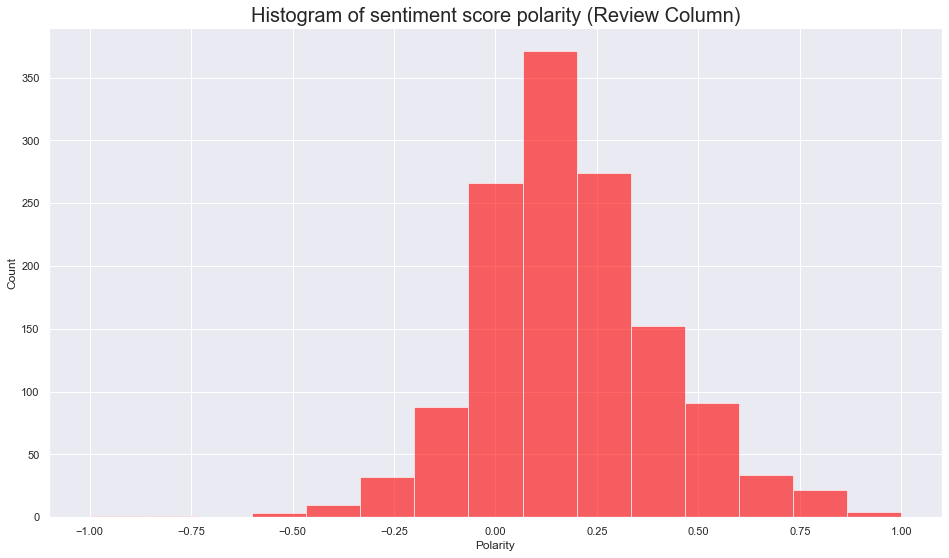

In [164]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(all_reviews['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity (Review Column)', fontsize=20)
plt.savefig('reviews_sentiment.png')

plt.show()



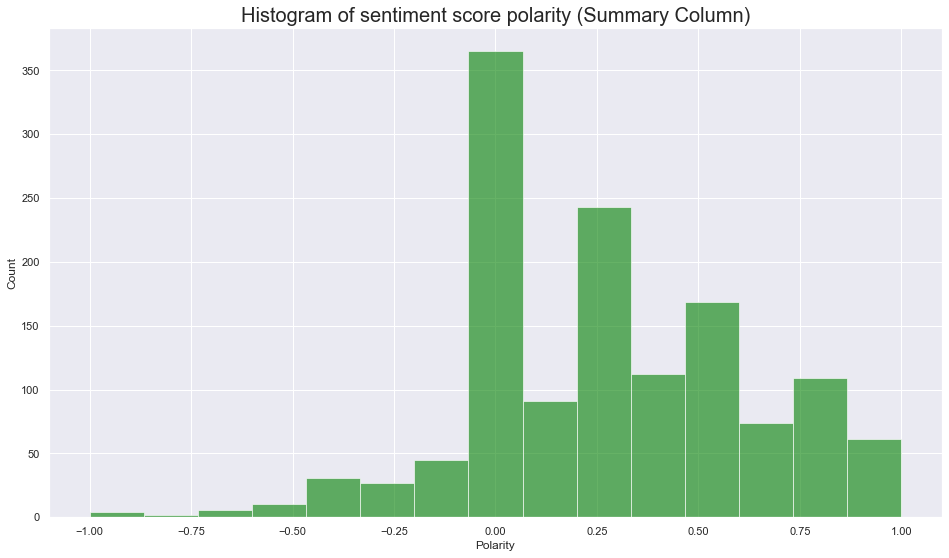

In [165]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(all_reviews['polarity_summary'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity (Summary Column)', fontsize=20)
plt.savefig('summary_sentiment.png')

plt.show()





Sentiment scores generally indicate a leaning towards positive feedback.  The summary column is most commonly evaluated as neutral, although the review column is more commonly positive.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [166]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_review_sentiment = all_reviews.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_review_sentiment = negative_review_sentiment[['review', 'product', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
negative_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,product,polarity_review,subjectivity_review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,1459,-1.000000,1.000000
147,incomplete kit very disappointing,6504,-0.780000,0.910000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,11056,-0.550000,0.300000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,2387,-0.500000,0.900000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,5758,-0.491667,0.433333
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,7384,-0.446250,0.533750
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,10281,-0.440741,0.485185
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,195,-0.400000,0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,3436,-0.400000,0.400000
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,4047,-0.400000,0.400000


In [167]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_summary_sentiment = all_reviews.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_summary_sentiment = negative_summary_sentiment[['summary', 'product', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
negative_summary_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})


,summary,product,polarity_summary,subjectivity_summary
17,the worst value ive ever seen,1241,-1.000000,1.000000
165,boring unless you are a craft person which i am,1459,-1.000000,1.000000
587,boring,2793,-1.000000,1.000000
837,before this i hated running any rpg campaign dealing with towns because it,6431,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,466,-0.800000,0.900000
116,disappointed,2807,-0.750000,0.750000
266,promotes anger instead of teaching calming methods,11025,-0.700000,0.200000
634,too bad this is not what i was expecting,6720,-0.700000,0.666667
637,bad qualityall made of paper,3436,-0.700000,0.666667
144,at age 31 i found these very difficult to make,7143,-0.650000,1.000000


In [168]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_review_sentiment = all_reviews.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_review_sentiment = positive_review_sentiment[['review', 'product', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
positive_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,product,polarity_review,subjectivity_review
564,perfect,9080,1.000000,1.000000
1080,my daughter loves her stickers awesome seller thank you,7101,1.000000,1.000000
1334,perfect for tutoring my grandson in spelling,9119,1.000000,1.000000
890,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,326,0.880000,0.860000
498,great quality very cute and perfect for my toddler,3165,0.816667,0.916667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,1970,0.800000,0.750000
336,great seller happy with my purchase 5 starrrr,9612,0.800000,0.875000
439,great easter gift for kids,577,0.800000,0.750000
491,these are great,6646,0.800000,0.750000
692,bought this because i wanted it all these dd games are great,3158,0.800000,0.750000


In [169]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_summary_sentiment = all_reviews.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_summary_sentiment = positive_summary_sentiment[['summary', 'product', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
positive_summary_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})


,summary,product,polarity_summary,subjectivity_summary
5,best gm screen ever,979,1.000000,0.300000
23,wonderful designs,231,1.000000,1.000000
27,perfect,2253,1.000000,1.000000
61,theyre the perfect size to keep in the car or a diaper,1618,1.000000,1.000000
107,perfect for preschooler,10196,1.000000,1.000000
112,awesome sticker activity for the price,4470,1.000000,1.000000
132,awesome book,10995,1.000000,1.000000
133,he was very happy with his gift,11004,1.000000,1.000000
150,awesome,4405,1.000000,1.000000
166,awesome and welldesigned for 9 year olds,1473,1.000000,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

Sentiment leans towards the positive side, with most common words used in reviews tending to be positive (i.e. great, fun, good, like).  'Game' and 'book' appear in both columns, suggesting that possibly books are a popular product.  Children, kids and family appear - reviews also suggest that products are often bought for kids, and this may be an indicator that buyers are quite often buying for children.  This fits well with the average age of customers (39), an age group that has children at home.

The top 20 positive and negative reviews are mostly classified correctly with some exceptions.  Including the product codes will allow the marketing team to identify the products referred to, and this may be something for further analysis and potentially for looking at repeatedly over time to establish whether there are strong feelings towards particular products.

# 